# Task 1: Data collection and preperation
### We need first to merge all indexes we found together

In [51]:
import pandas as pd
import numpy as np
import datetime 
import os
import matplotlib.pyplot as plt
%matplotlib inline
def update_df2(this_df,df):
    df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df=df.set_index('Date')
    df.index = pd.DatetimeIndex(df.index)
    #remove the duplicated index
    df = df[~df.index.duplicated()]
    df = df.reindex(idx)
    try:
        df=df.drop(['_id'], axis=1)     
    except:
        pass
    
    # merge two data 
    if len(this_df)==0:
        if len(df)!=0:
            this_df=df
    else:
        this_df=pd.concat([this_df,df],axis=1)
    return this_df

# setup necessaty parameter
path = 'C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/'
idx = pd.date_range('2001-01-03', '2019-04-30')
csv_files  = []
xlsx_files = []
this_df    = []
maturity   = 5

### Get the list of future price files

In [52]:
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            csv_files.append(os.path.join(r, file))
        if '.xlsx' in file:
            xlsx_files.append(os.path.join(r, file))
print(len(xlsx_files))

10


In [54]:
# concate and merge all the dataframes
for file in csv_files:
    df=pd.read_csv(file)
    this_df = update_df2(this_df,df)

for file in xlsx_files:
    df=pd.read_excel(file)
    print(file)
    this_df = update_df2(this_df,df)
# save daily data to one csv
this_df.to_csv('daily_index.csv')
print(np.shape(this_df))

C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 bean active future.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 cocoa active futures.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 coffee active futures.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 copper active future.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 corn active future.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 lead active futures.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 nickel active future.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 rice active future.xlsx
C:/Users/richard/Documents/stable/algorithm hedging/usable index/pricefiles/daily 2000 soybean active 

### Convert daily data into monthly data and calculate return rate

In [55]:
''' convert daily data to monthly frequency '''
this_df=pd.read_csv('daily_index.csv',index_col=0)
this_df.index = pd.DatetimeIndex(this_df.index)
groups = this_df.resample('M')
monthly_data = groups.mean()

''' calculate return ratio per future during maturity period'''
return_ratio=(monthly_data.iloc[maturity:,:]-monthly_data.iloc[:-maturity,:].values).divide(monthly_data.iloc[:-maturity,:].values)

C:\Users\richard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14,21,28,29,30,31,34,35,39,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Now, introduce Dynamic Time Warping with Financial Time Series

In [56]:
from dtw import dtw
import pandas_datareader.data as web
import numpy as np
from numpy.linalg import norm
from numpy import array
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style("whitegrid", {'font_scale':0.5,
                           'font.scale':0.5,
                           'xtick.color':'#A5A5A5',
                           'ytick.color':'#A5A5A5',
                           'axes.linewidth': 0.2,
                           'axes.facecolor': '#EEEEEE',
                           'text.color': '#424242',
                           'legend.frameon': True})

In [63]:
def show_case_dtw(a,b):
    x = array(return_ratio.iloc[:,a]).reshape(-1, 1)
    y = array(return_ratio.iloc[:,b]).reshape(-1, 1)
    plt.figure(figsize=(15,5))
    plt.plot(return_ratio.index,x)
    plt.plot(return_ratio.index,y)
    plt.title('Future Return Rate', fontsize=22)
    plt.show()

    dist, cost, acc, path = dtw(x, y, dist=lambda x, y: norm(x - y, ord=1))
    # acc.T is the accumulated cost matrix returned from the dtw( ) function.
    # origin is which part of the chart to start the plot.
    # cmap is shorthand for color map. The 'prism' palette is particularly useful for visualizing DTW outputs.
    plt.figure(figsize=(10,10))
    plt.imshow(acc.T, origin='lower', cmap='tab20c', interpolation='nearest')
    plt.title('Cummulative Distance', fontsize=22)
    plt.plot(path[0], path[1], 'w')
    plt.xlim((-0.5, acc.shape[0]-0.5))
    plt.ylim((-0.5, acc.shape[1]-0.5))

    plt.show()
    plt.clf() # Clear the current figure in-case we want to generate or try a different plot.
    print(dist)
    return None


### show you the relation between DTW distance and index performance

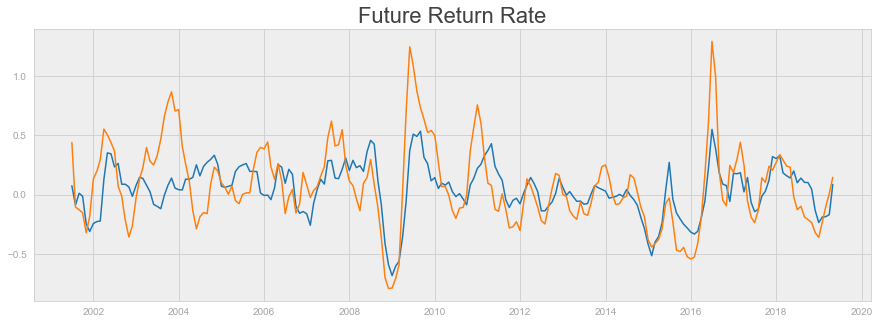

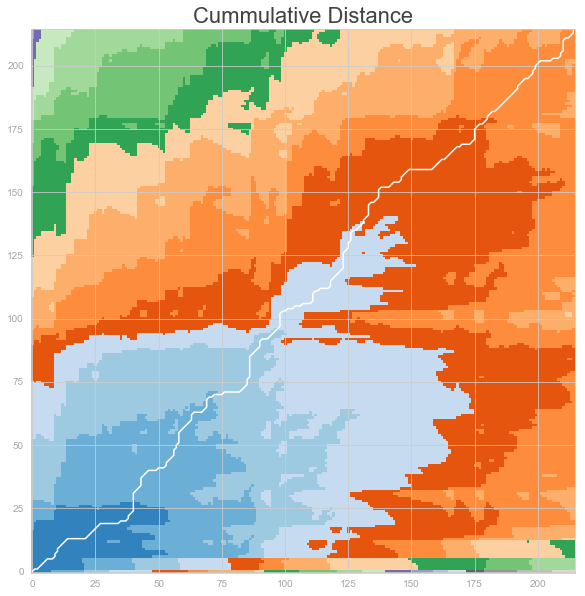

0.05917748510205317


<Figure size 432x288 with 0 Axes>

In [64]:
show_case_dtw(1,24)

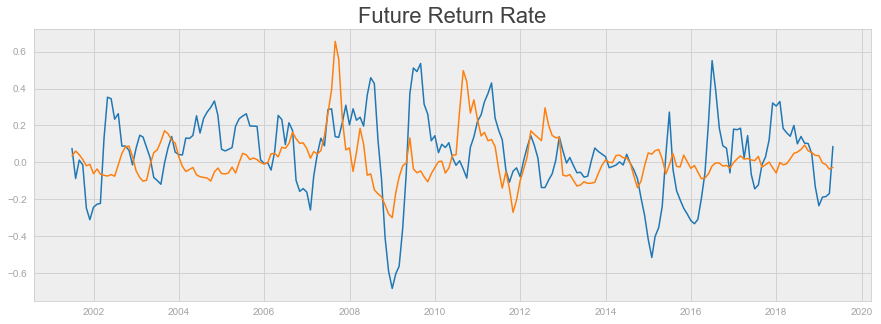

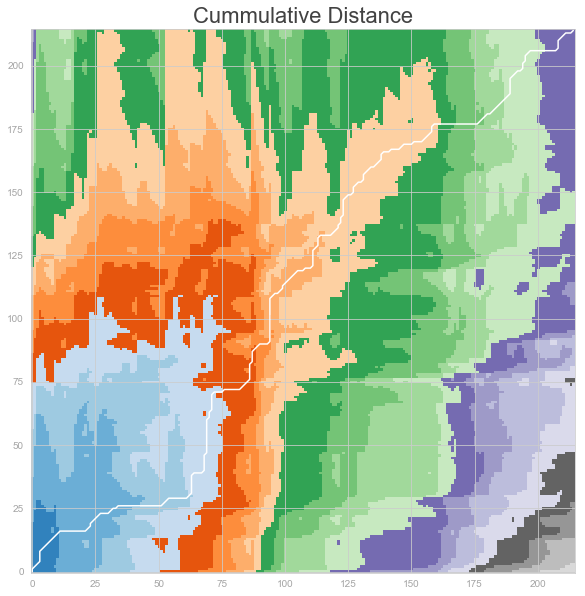

0.0509323093051524


<Figure size 432x288 with 0 Axes>

In [59]:
show_case_dtw(1,9)